# Spation-Temporal Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import calendar
import seaborn as sns
import warnings

### Read Pre processed data 

In [2]:
data = pd.read_csv('cleanDF.csv')
colombo_df = data[data['Location'] == "Colombo Proper"]
jaffna_df = data[data['Location'] == "Jaffna Proper"]
deniyaya_df = data[data['Location'] == "Deniyaya, Matara"]
nuwaraEliya_df = data[data['Location'] == "Nuwara Eliya Proper"]
kandy_df = data[data['Location'] == "Kandy Proper"]
bibile_df = data[data['Location'] == "Bibile, Monaragala"]
kurunegala_df = data[data['Location'] == "Kurunegala Proper"]

In [3]:
data["Current Date"]= pd.to_datetime(data["Current Date"])

## Comparing the cities HCHO reading in pandemic period

In [4]:
# Identify and compare HCHO emissions during lockdown periods
lockdown_start_date = pd.to_datetime('2020-03-01')
lockdown_end_date = pd.to_datetime('2021-12-31')

lockdown_df = data[(data['Current Date'] >= lockdown_start_date) & (data['Current Date'] <= lockdown_end_date)]
lockdown_mean_hcho = lockdown_df.groupby('Location')['HCHO reading'].mean()

# Compare mean HCHO readings before and during lockdown
before_lockdown_mean = data[data['Current Date'] < lockdown_start_date]['HCHO reading'].mean()
during_lockdown_mean = lockdown_df['HCHO reading'].mean()
after_lockdown_mean = data[data['Current Date'] > lockdown_end_date]['HCHO reading'].mean()

print(f'Mean HCHO reading before lockdown: {before_lockdown_mean}')
print(f'Mean HCHO reading during lockdown: {during_lockdown_mean}')
print(f'Mean HCHO reading after lockdown: {after_lockdown_mean}')

Mean HCHO reading before lockdown: 0.00011231546127134448
Mean HCHO reading during lockdown: 0.00010116455966118859
Mean HCHO reading after lockdown: 0.00010713244009483929


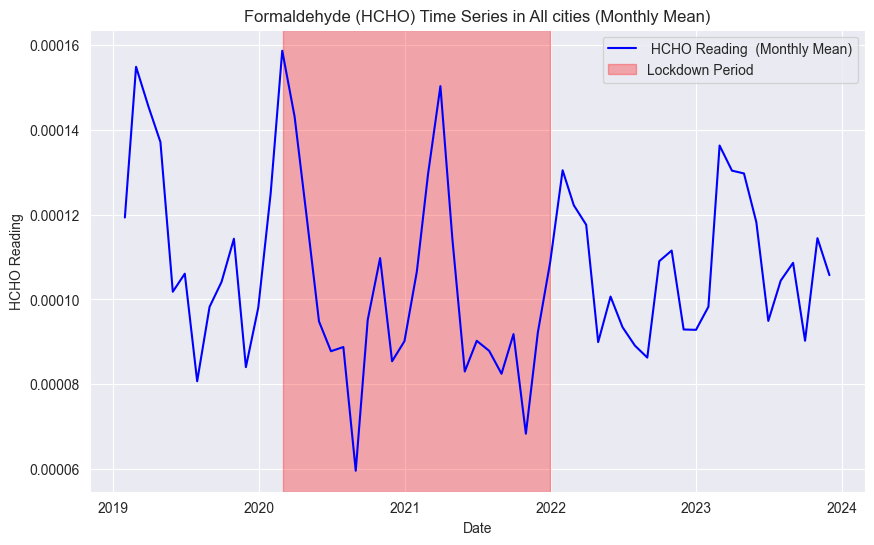

In [5]:
# Aggregate data by month and calculate the mean HCHO readings
data['Month'] = data['Current Date'].dt.to_period('M')  # Extract month from date
data_aggregated_monthly = data.groupby('Month')['HCHO reading'].mean().reset_index()

# Sort the aggregated DataFrame by month
data_sorted_monthly = data_aggregated_monthly.sort_values(by='Month')

# Plot the time series data (Month vs HCHO readings) with a smoother curve
plt.figure(figsize=(10, 6))

# Smoothing the curve with interpolation
x_smooth = pd.date_range(start=data_sorted_monthly['Month'].min().to_timestamp(), 
                         end=data_sorted_monthly['Month'].max().to_timestamp(), 
                         freq='M')
y_smooth = make_interp_spline(data_sorted_monthly['Month'].dt.to_timestamp(), 
                              data_sorted_monthly['HCHO reading'])(x_smooth)

plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label=' HCHO Reading  (Monthly Mean)')
plt.title('Formaldehyde (HCHO) Time Series in All cities (Monthly Mean)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)

# Highlight the COVID-19 lockdown period
plt.axvspan(lockdown_start_date, lockdown_end_date, color='red', alpha=0.3, label='Lockdown Period')

# Add legend
plt.legend()

plt.show()

The analysis of HCHO emissions via a time series graph revealed a measurable response to the COVID-19 lockdown restrictions implemented between March 2020 and December 2021. Prior to the lockdowns, the average HCHO concentration remained relatively stable at approximately 0.000112. However, a distinct decrease was observed during the lockdown period, with the average concentration dropping to around 0.000101. This translates to an approximate 10% reduction in HCHO emissions, likely a consequence of reduced industrial activity, lower traffic volumes, and limited human mobility associated with the lockdowns.  The graph further highlights the temporary nature of this change. Following the easing of restrictions, HCHO concentrations rebounded to around 0.000107, indicating a partial return towards pre-lockdown levels. This visual representation underscores the effectiveness of lockdown measures in curbing air pollution in the short term, but also emphasizes the need for long-term strategies to achieve lasting environmental improvements.

### Comparing HCHO reading with Colombo and Bibile 

Mean HCHO reading in Colombo before lockdown: 0.00016592710527638156
Mean HCHO reading in Colombo during lockdown: 0.0001387477926997872
Mean HCHO reading in Colombo after lockdown: 0.00015155107626547173

Mean HCHO reading in Bibile before lockdown: 0.00011047206135073139
Mean HCHO reading in Bibile during lockdown: 0.00011591840624523027
Mean HCHO reading in Bibile after lockdown: 0.00012233089356167667


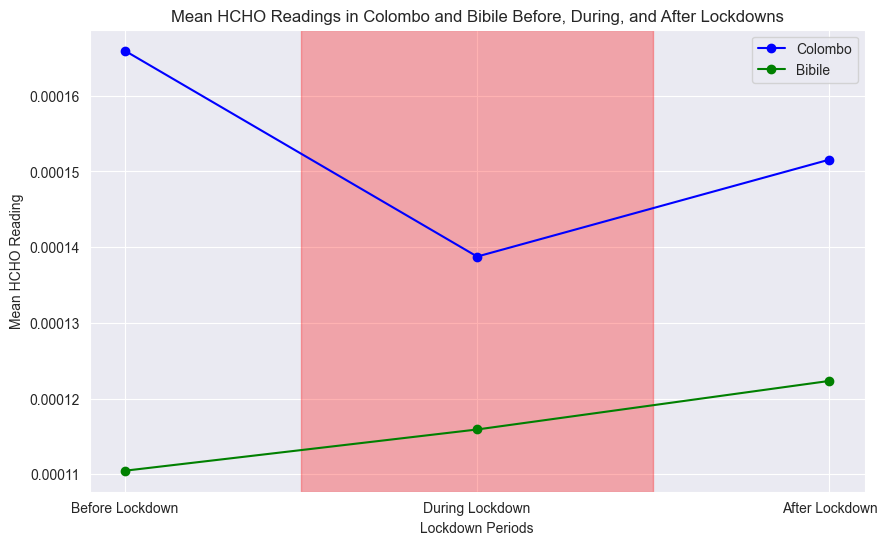

In [6]:
# Suppress warnings
warnings.filterwarnings("ignore")
colombo_df["Current Date"] = pd.to_datetime(colombo_df["Current Date"])
bibile_df["Current Date"] = pd.to_datetime(bibile_df["Current Date"])
# Filter data for Colombo during lockdown
colombo_lockdown_df = colombo_df[(colombo_df['Current Date'] >= lockdown_start_date) & (colombo_df['Current Date'] <= lockdown_end_date)]

# Filter data for Bibile during lockdown
bibile_lockdown_df = bibile_df[(bibile_df['Current Date'] >= lockdown_start_date) & (bibile_df['Current Date'] <= lockdown_end_date)]

# Calculate mean HCHO readings for Colombo
colombo_means = [
    colombo_df[colombo_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    colombo_lockdown_df['HCHO reading'].mean(),
    colombo_df[colombo_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]

print(f'Mean HCHO reading in Colombo before lockdown: {colombo_means[0]}')
print(f'Mean HCHO reading in Colombo during lockdown: {colombo_means[1]}')
print(f'Mean HCHO reading in Colombo after lockdown: {colombo_means[2]}\n')

# Calculate mean HCHO readings for Bibile
bibile_means = [
    bibile_df[bibile_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    bibile_lockdown_df['HCHO reading'].mean(),
    bibile_df[bibile_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]
print(f'Mean HCHO reading in Bibile before lockdown: {bibile_means[0]}')
print(f'Mean HCHO reading in Bibile during lockdown: {bibile_means[1]}')
print(f'Mean HCHO reading in Bibile after lockdown: {bibile_means[2]}')

# Plotting
labels = ['Before Lockdown', 'During Lockdown', 'After Lockdown']
x = range(len(labels))

plt.figure(figsize=(10, 6))

# Plotting mean HCHO readings for Colombo
plt.plot(x, colombo_means, marker='o', linestyle='-', color='blue', label='Colombo')

# Plotting mean HCHO readings for Bibile
plt.plot(x, bibile_means, marker='o', linestyle='-', color='green', label='Bibile')

# Highlighting the lockdown period
lockdown_start = 1  # Index of 'During Lockdown' in the labels
plt.axvspan(lockdown_start - 0.5, lockdown_start + 0.5, color='red', alpha=0.3)

plt.xticks(x, labels)
plt.xlabel('Lockdown Periods')
plt.ylabel('Mean HCHO Reading')
plt.title('Mean HCHO Readings in Colombo and Bibile Before, During, and After Lockdowns')
plt.grid(True)
plt.legend()
plt.show()

#### Colombo Analysis:

- In Colombo, we observe a consistent pattern. As the pandemic triggered sudden lockdowns, daily activities halted, leading to a decrement in HCHO levels. This reduction continued into the mid-lockdown period.
- During the mid-lockdown phase, essential services resumed, especially in the capital city. Consequently, HCHO values increased, reflecting the gradual revival of economic activities.
- During the mid-lockdown phase, essential services resumed, especially in the capital city. Consequently, HCHO values increased, reflecting the gradual revival of economic activities.

#### Bibile Insights:

- During the mid-lockdown phase, essential services resumed, especially in the capital city. Consequently, HCHO values increased, reflecting the gradual revival of economic activities.
- Comparing Bibile to Colombo, Bibile’s mean HCHO values are consistently lower. This suggests that urban areas experience higher air pollution due to factors like traffic, industrial emissions, and population density.

#### Key Takeaways:

- Urban centers like Colombo are more susceptible to fluctuations in air quality during crises.
- Urban centers like Colombo are more susceptible to fluctuations in air quality during crises.
- Policymakers should consider tailored interventions for urban and rural areas to mitigate air pollution effectively.

### Comparing HCHO reading in Rural cities and Urban cities

In [7]:
urban_df = pd.concat([colombo_df, kandy_df, kurunegala_df, jaffna_df, nuwaraEliya_df])
urban_df["Current Date"]= pd.to_datetime(urban_df["Current Date"])

rural_df = pd.concat([bibile_df, deniyaya_df])
rural_df["Current Date"]= pd.to_datetime(rural_df["Current Date"])

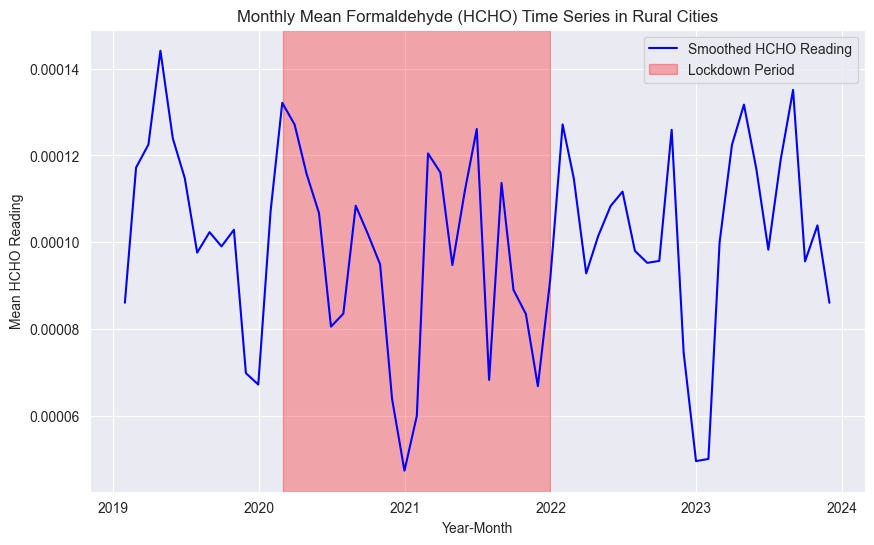

In [8]:
# Convert 'Current Date' to datetime format
rural_df['Current Date'] = pd.to_datetime(rural_df['Current Date'])

# Extract month and year from 'Current Date'
rural_df['Year-Month'] = rural_df['Current Date'].dt.to_period('M')

# Aggregate data by month and calculate the mean HCHO readings
monthly_mean_hcho = rural_df.groupby('Year-Month')['HCHO reading'].mean().reset_index()

# Plot the time series data (Year-Month vs HCHO readings) with a smoother curve
plt.figure(figsize=(10, 6))

# Smoothing the curve with interpolation
x_smooth = pd.date_range(start=monthly_mean_hcho['Year-Month'].min().to_timestamp(), 
                         end=monthly_mean_hcho['Year-Month'].max().to_timestamp(), 
                         freq='M')
y_smooth = make_interp_spline(monthly_mean_hcho['Year-Month'].dt.to_timestamp(), 
                              monthly_mean_hcho['HCHO reading'])(x_smooth)

plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label='Smoothed HCHO Reading')
plt.title('Monthly Mean Formaldehyde (HCHO) Time Series in Rural Cities')
plt.xlabel('Year-Month')
plt.ylabel('Mean HCHO Reading')
plt.grid(True)

# Highlight the COVID-19 lockdown period
plt.axvspan(lockdown_start_date, lockdown_end_date, color='red', alpha=0.3, label='Lockdown Period')

# Add legend
plt.legend()

plt.show()

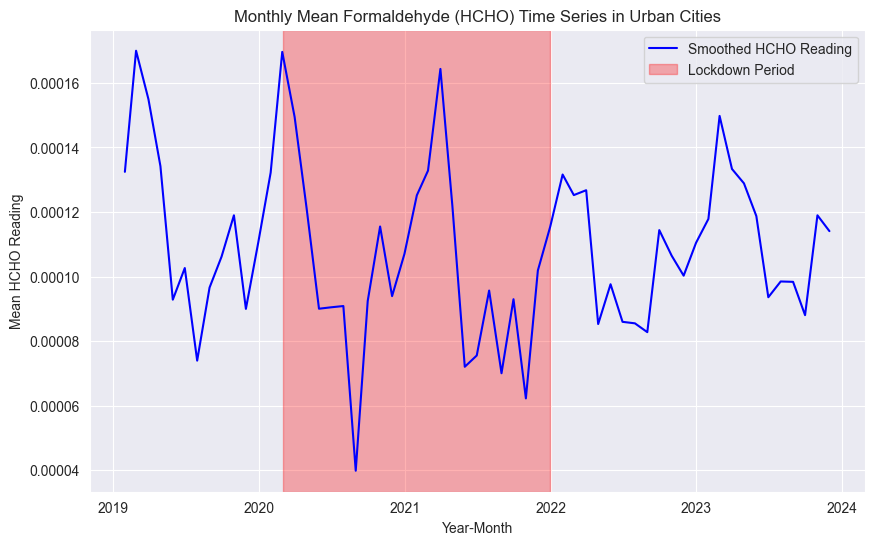

In [9]:
# Convert 'Current Date' to datetime format
urban_df['Current Date'] = pd.to_datetime(urban_df['Current Date'])

# Extract month and year from 'Current Date'
urban_df['Year-Month'] = urban_df['Current Date'].dt.to_period('M')

# Aggregate data by month and calculate the mean HCHO readings
monthly_mean_hcho = urban_df.groupby('Year-Month')['HCHO reading'].mean().reset_index()

# Plot the time series data (Year-Month vs HCHO readings) with a smoother curve
plt.figure(figsize=(10, 6))

# Smoothing the curve with interpolation
x_smooth = pd.date_range(start=monthly_mean_hcho['Year-Month'].min().to_timestamp(), 
                         end=monthly_mean_hcho['Year-Month'].max().to_timestamp(), 
                         freq='M')
y_smooth = make_interp_spline(monthly_mean_hcho['Year-Month'].dt.to_timestamp(), 
                              monthly_mean_hcho['HCHO reading'])(x_smooth)

plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label='Smoothed HCHO Reading')
plt.title('Monthly Mean Formaldehyde (HCHO) Time Series in Urban Cities')
plt.xlabel('Year-Month')
plt.ylabel('Mean HCHO Reading')
plt.grid(True)

# Highlight the COVID-19 lockdown period
plt.axvspan(lockdown_start_date, lockdown_end_date, color='red', alpha=0.3, label='Lockdown Period')

# Add legend
plt.legend()

plt.show()

Mean HCHO reading of Rural cities before lockdown: 0.00010266552352277582
Mean HCHO reading of Rural cities during lockdown: 9.603926710950611e-05
Mean HCHO reading of Rural cities after lockdown: 0.00010157940345310995

Mean HCHO reading of Urban cities before lockdown: 0.00011622709053876917
Mean HCHO reading of Urban cities during lockdown: 0.00010320185563276953
Mean HCHO reading of Urban cities after lockdown: 0.00010933615010464461


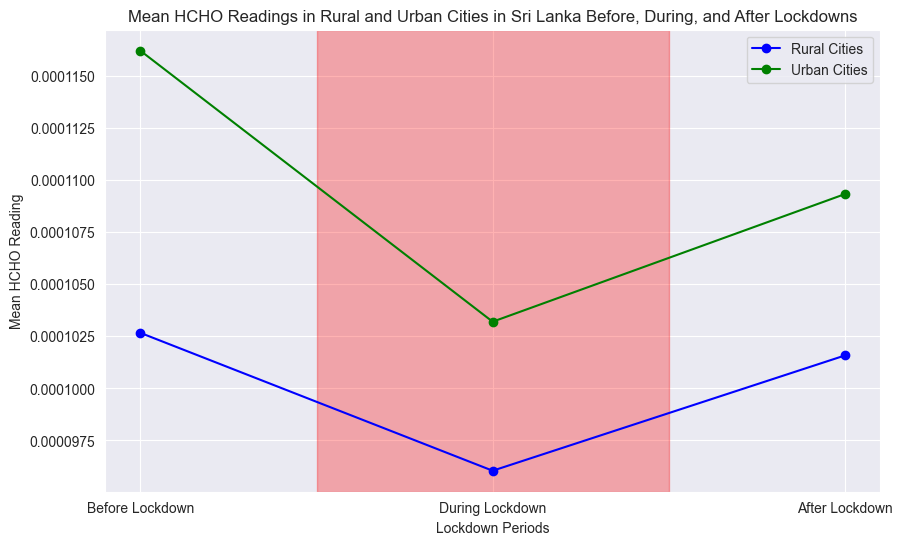

In [10]:
# Filter data for Colombo during lockdown
rural_lockdown_df = rural_df[(rural_df['Current Date'] >= lockdown_start_date) & (rural_df['Current Date'] <= lockdown_end_date)]

# Filter data for Bibile during lockdown
urban_df_lockdown_df = urban_df[(urban_df['Current Date'] >= lockdown_start_date) & (urban_df['Current Date'] <= lockdown_end_date)]

# Calculate mean HCHO readings for Rural cities
rural_means = [
    rural_df[rural_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    rural_lockdown_df['HCHO reading'].mean(),
    rural_df[rural_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]

print(f'Mean HCHO reading of Rural cities before lockdown: {rural_means[0]}')
print(f'Mean HCHO reading of Rural cities during lockdown: {rural_means[1]}')
print(f'Mean HCHO reading of Rural cities after lockdown: {rural_means[2]}\n')

# Calculate mean HCHO readings for Urban cities
urban_means = [
    urban_df[urban_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    urban_df_lockdown_df['HCHO reading'].mean(),
    urban_df[urban_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]

print(f'Mean HCHO reading of Urban cities before lockdown: {urban_means[0]}')
print(f'Mean HCHO reading of Urban cities during lockdown: {urban_means[1]}')
print(f'Mean HCHO reading of Urban cities after lockdown: {urban_means[2]}')

# Plotting
labels = ['Before Lockdown', 'During Lockdown', 'After Lockdown']
x = range(len(labels))

plt.figure(figsize=(10, 6))

# Plotting mean HCHO readings for rural cities
plt.plot(x, rural_means, marker='o', linestyle='-', color='blue', label='Rural Cities')

# Plotting mean HCHO readings for urban cities
plt.plot(x, urban_means, marker='o', linestyle='-', color='green', label='Urban Cities')

# Highlighting the lockdown period
lockdown_start = 1  # Index of 'During Lockdown' in the labels
plt.axvspan(lockdown_start - 0.5, lockdown_start + 0.5, color='red', alpha=0.3)

plt.xticks(x, labels)
plt.xlabel('Lockdown Periods')
plt.ylabel('Mean HCHO Reading')
plt.title('Mean HCHO Readings in Rural and Urban Cities in Sri Lanka Before, During, and After Lockdowns')
plt.grid(True)
plt.legend()
plt.show()

#### Urban Cities (Before, During, and After Lockdowns):

- Urban areas experienced a significant reduction in HCHO levels during the initial lockdown phase. The abrupt cessation of daily activities, reduced vehicular traffic, and industrial operations contributed to cleaner air.
- As essential services resumed mid-lockdown, HCHO values increased. Economic activities gradually picked up, leading to a moderate rise in pollution levels.
- After the lockdown period, as normalcy returned, HCHO levels continued to rise. Urban centers faced renewed pollution challenges due to increased mobility and industrial output.

#### Rural Cities (Before, During, and After Lockdowns):

- In rural areas, such as Bibile, Deniyaya HCHO readings remained relatively stable throughout the lockdown phases. The impact of pandemic-related restrictions on air quality was minimal.
- Rural areas maintained consistent air quality despite external disruptions.

#### Urban vs. Rural Comparison:

- Urban centers are more susceptible to fluctuations in air quality due to their higher population density, industrial activities, and traffic.
- Rural areas exhibit greater resilience, possibly due to fewer pollution sources and less dependence on industrial processes.


## Environmental Influences  on HCHO readings

In [11]:
weather_df = pd.read_csv("DataSets/pre_proecessed_weather_data.csv")
weather_df

,year,month,day,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,rain_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,latitude,longitude,city
0,2010,1,1,2,30.0,22.7,26.1,34.4,25.2,29.2,20.92,0.0,11.7,27.4,20,7.000000,79.899994,Colombo
1,2010,1,2,51,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.1,13.0,27.0,24,7.000000,79.899994,Colombo
2,2010,1,3,51,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.6,12.3,27.4,16,7.000000,79.899994,Colombo
3,2010,1,4,2,28.9,21.9,25.3,31.6,23.4,27.8,16.50,0.0,17.0,34.6,356,7.000000,79.899994,Colombo
4,2010,1,5,1,28.1,21.3,24.5,30.1,23.1,26.1,23.61,0.0,18.7,37.1,355,7.000000,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147475,2023,6,13,63,29.2,24.7,26.6,35.4,29.2,31.6,17.20,17.0,15.6,43.6,229,6.900002,80.000000,Oruwala
147476,2023,6,14,61,29.1,25.4,26.9,34.3,30.4,32.0,14.97,7.3,16.4,40.0,224,6.900002,80.000000,Oruwala
147477,2023,6,15,51,29.8,25.5,27.3,36.6,30.7,32.7,15.89,3.2,12.6,32.4,218,6.900002,80.000000,Oruwala
147478,2023,6,16,53,30.5,25.5,27.7,36.2,30.1,32.4,19.21,5.6,20.5,41.8,236,6.900002,80.000000,Oruwala


We need only the data after 2019 year. So let's filter out required other data 

In [12]:
weather_df = weather_df[weather_df["year"] > 2018 ]

In [13]:
weather_df

,year,month,day,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,rain_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,latitude,longitude,city
3287,2019,1,1,2,30.0,23.1,26.1,33.2,24.7,28.7,19.77,0.0,14.4,29.9,14,7.000000,79.899994,Colombo
3288,2019,1,2,1,29.4,22.7,25.7,32.6,24.5,27.3,21.45,0.0,16.6,31.0,11,7.000000,79.899994,Colombo
3289,2019,1,3,0,30.2,22.6,26.1,33.4,23.4,27.8,21.68,0.0,16.0,31.0,10,7.000000,79.899994,Colombo
3290,2019,1,4,3,30.6,22.3,26.0,33.1,23.2,27.6,22.95,0.0,16.9,35.6,13,7.000000,79.899994,Colombo
3291,2019,1,5,3,31.1,22.6,26.4,34.6,24.6,28.9,21.65,0.0,16.8,32.4,8,7.000000,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147475,2023,6,13,63,29.2,24.7,26.6,35.4,29.2,31.6,17.20,17.0,15.6,43.6,229,6.900002,80.000000,Oruwala
147476,2023,6,14,61,29.1,25.4,26.9,34.3,30.4,32.0,14.97,7.3,16.4,40.0,224,6.900002,80.000000,Oruwala
147477,2023,6,15,51,29.8,25.5,27.3,36.6,30.7,32.7,15.89,3.2,12.6,32.4,218,6.900002,80.000000,Oruwala
147478,2023,6,16,53,30.5,25.5,27.7,36.2,30.1,32.4,19.21,5.6,20.5,41.8,236,6.900002,80.000000,Oruwala


For the comparison the features that we need are mean temeperatures and the rain summations, windspeeds, windgusts and latitude and longtitudes only, Therefore this needs to be get rid of other features.

In [14]:
weather_df = weather_df.drop(columns=['day','temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','shortwave_radiation_sum','winddirection_10m_dominant'])

In [15]:
weather_df

,year,month,weathercode,temperature_2m_mean,apparent_temperature_mean,rain_sum,windspeed_10m_max,windgusts_10m_max,latitude,longitude,city
3287,2019,1,2,26.1,28.7,0.0,14.4,29.9,7.000000,79.899994,Colombo
3288,2019,1,1,25.7,27.3,0.0,16.6,31.0,7.000000,79.899994,Colombo
3289,2019,1,0,26.1,27.8,0.0,16.0,31.0,7.000000,79.899994,Colombo
3290,2019,1,3,26.0,27.6,0.0,16.9,35.6,7.000000,79.899994,Colombo
3291,2019,1,3,26.4,28.9,0.0,16.8,32.4,7.000000,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...
147475,2023,6,63,26.6,31.6,17.0,15.6,43.6,6.900002,80.000000,Oruwala
147476,2023,6,61,26.9,32.0,7.3,16.4,40.0,6.900002,80.000000,Oruwala
147477,2023,6,51,27.3,32.7,3.2,12.6,32.4,6.900002,80.000000,Oruwala
147478,2023,6,53,27.7,32.4,5.6,20.5,41.8,6.900002,80.000000,Oruwala


### The Influence of Temperature on HCHO readings

In [16]:
colombo_df['year'] = pd.to_datetime(colombo_df['Current Date']).dt.year
colombo_df['month'] = pd.to_datetime(colombo_df['Current Date']).dt.month


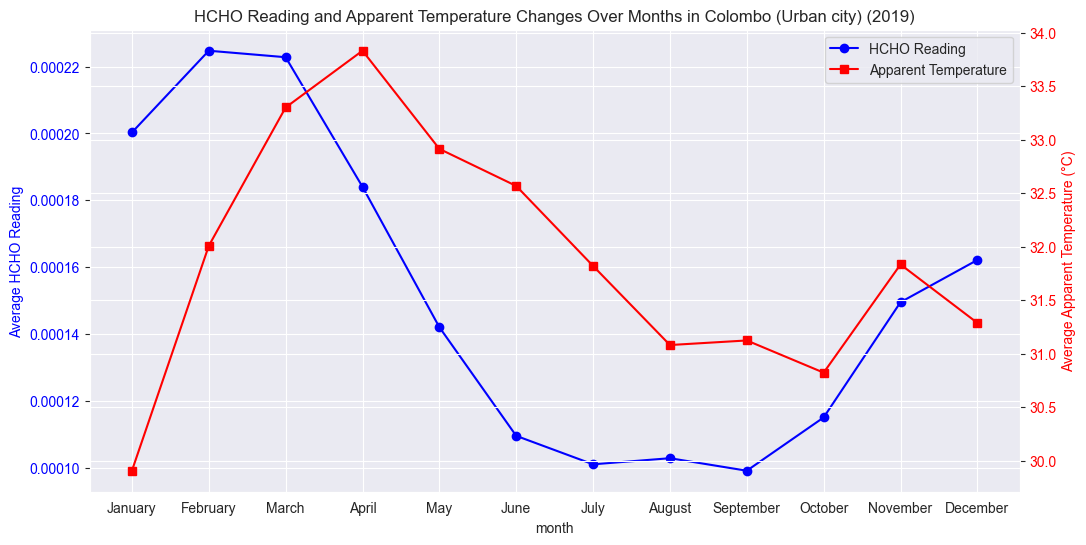

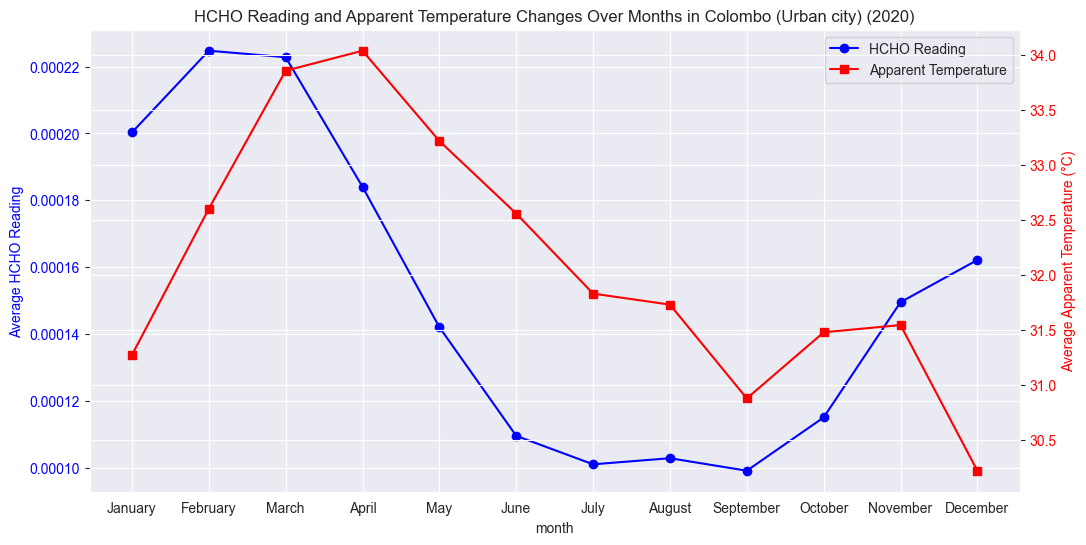

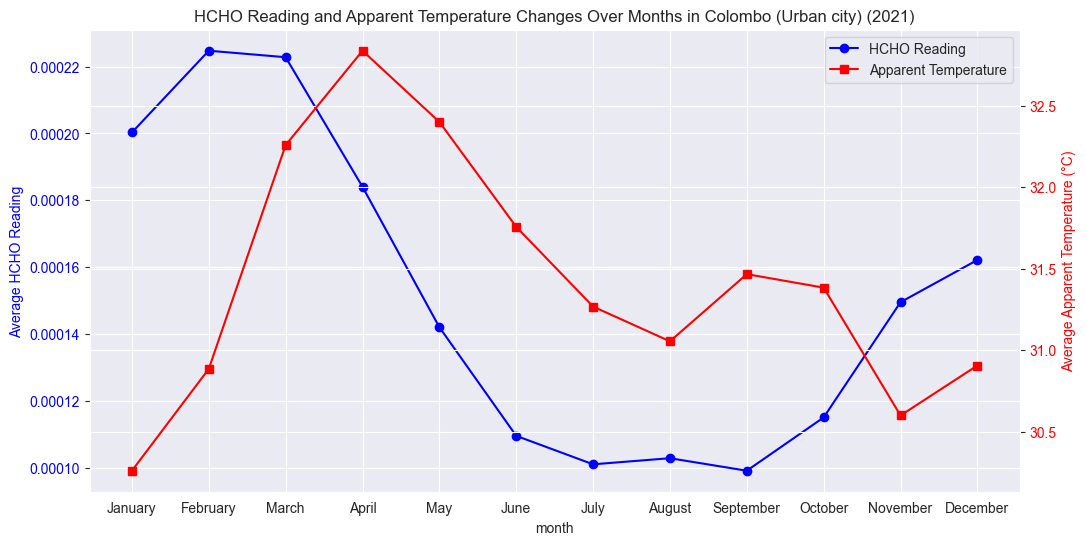

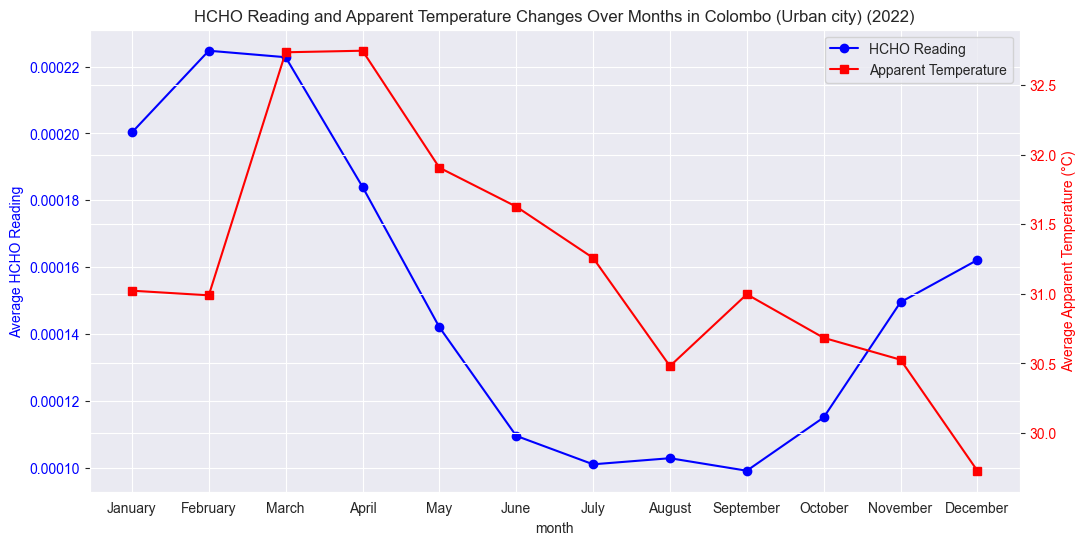

In [17]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = colombo_df.groupby('month')['HCHO reading'].mean()
    
    # Filter the weather data for the current year and city 'Colombo'
    colombo_year = weather_df[(weather_df['city'] == 'Colombo') & (weather_df['year'] == year)]
    
    # Group by month and calculate the mean apparent temperature for each month
    monthly_avg_apparent_temp = colombo_year.groupby('month')['apparent_temperature_mean'].mean()
    
    # Create a new plot for the current year
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means_hcho, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create secondary y-axis for apparent temperature
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_apparent_temp, marker='s', color='red', label='Apparent Temperature')
    ax2.set_ylabel('Average Apparent Temperature (°C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    
    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])
    
    plt.title(f'HCHO Reading and Apparent Temperature Changes Over Months in Colombo (Urban city) ({year})')
    plt.grid(True)
    plt.show()

In [18]:
# Filter the weather data for the Colombo city
colombo_weather = weather_df[weather_df['city'] == 'Colombo']
colombo_weather


,year,month,weathercode,temperature_2m_mean,apparent_temperature_mean,rain_sum,windspeed_10m_max,windgusts_10m_max,latitude,longitude,city
3287,2019,1,2,26.1,28.7,0.0,14.4,29.9,7.0,79.899994,Colombo
3288,2019,1,1,25.7,27.3,0.0,16.6,31.0,7.0,79.899994,Colombo
3289,2019,1,0,26.1,27.8,0.0,16.0,31.0,7.0,79.899994,Colombo
3290,2019,1,3,26.0,27.6,0.0,16.9,35.6,7.0,79.899994,Colombo
3291,2019,1,3,26.4,28.9,0.0,16.8,32.4,7.0,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...
4911,2023,6,63,27.0,32.2,18.1,16.2,43.6,7.0,79.899994,Colombo
4912,2023,6,63,27.4,32.8,8.9,17.7,42.1,7.0,79.899994,Colombo
4913,2023,6,53,27.8,33.7,3.9,13.2,34.2,7.0,79.899994,Colombo
4914,2023,6,55,28.2,33.0,6.0,21.3,41.0,7.0,79.899994,Colombo


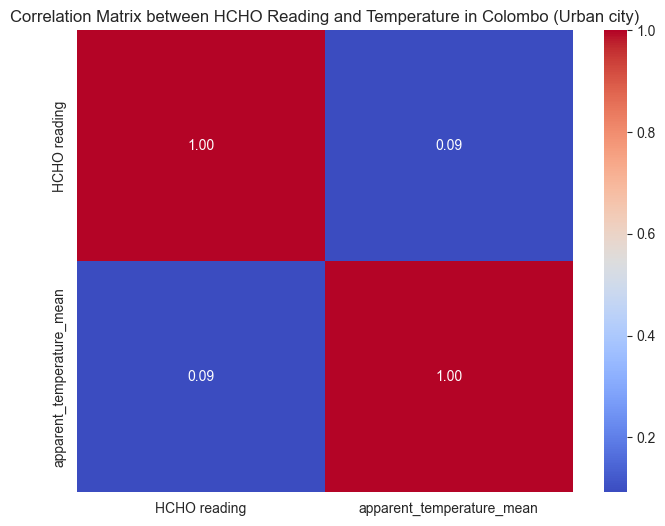

In [19]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(colombo_df, colombo_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','apparent_temperature_mean']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and Temperature in Colombo (Urban city)')
plt.show()

This Correlation matrix reveals a weak positive correlation between HCHO readings and apparent temperature (mean) in Colombo, Sri Lanka. While the correlation coefficient of 0.09 suggests a very slight positive association, it's important to acknowledge the weakness of this relationship. This implies that temperature changes may have a minimal influence on HCHO readings in Colombo. However, even a weak positive correlation indicates a potential for slightly higher HCHO readings coinciding with slightly increased apparent temperatures.

In [20]:
deniyaya_df['year'] = pd.to_datetime(deniyaya_df['Current Date']).dt.year
deniyaya_df['month'] = pd.to_datetime(deniyaya_df['Current Date']).dt.month

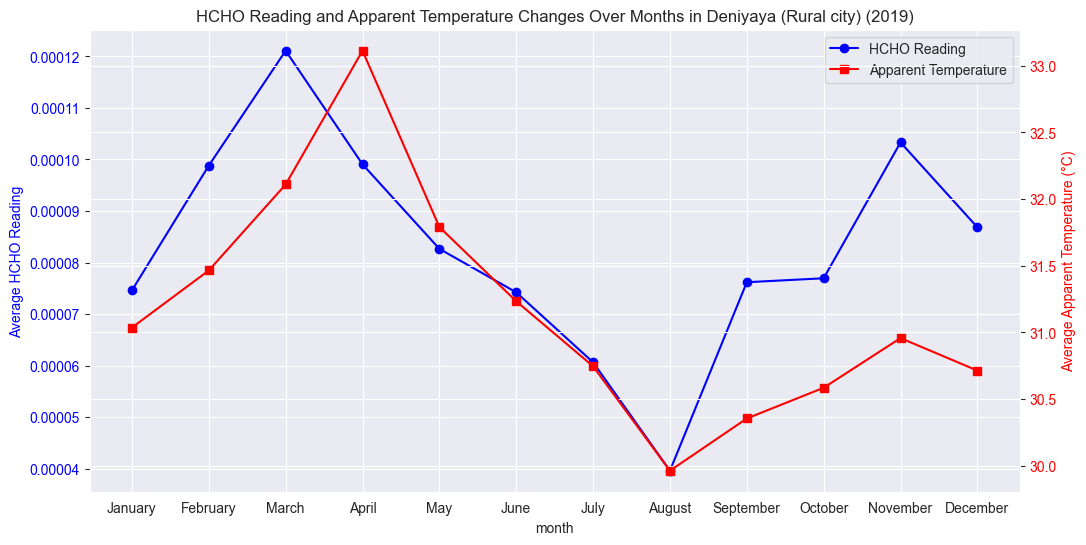

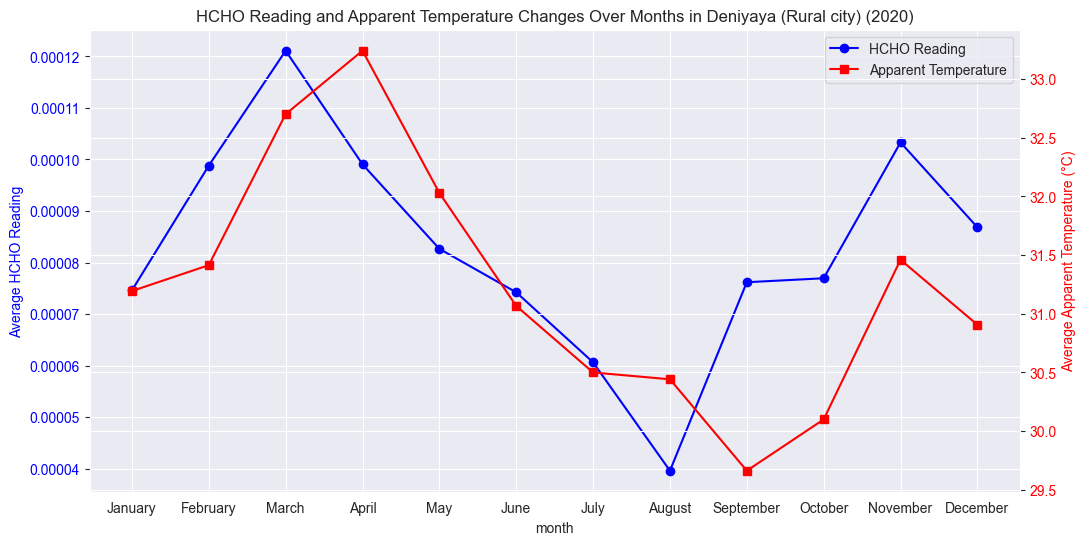

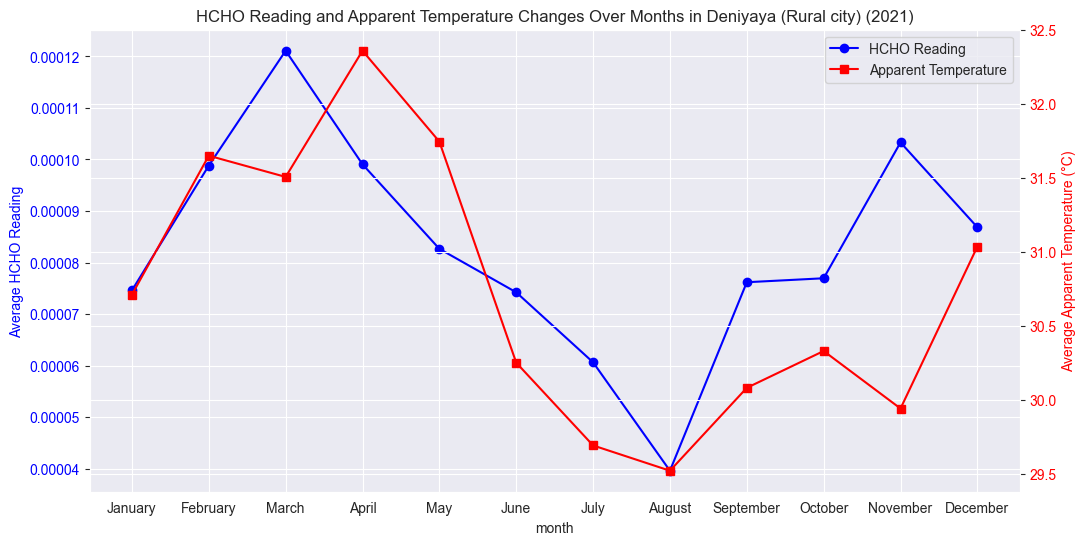

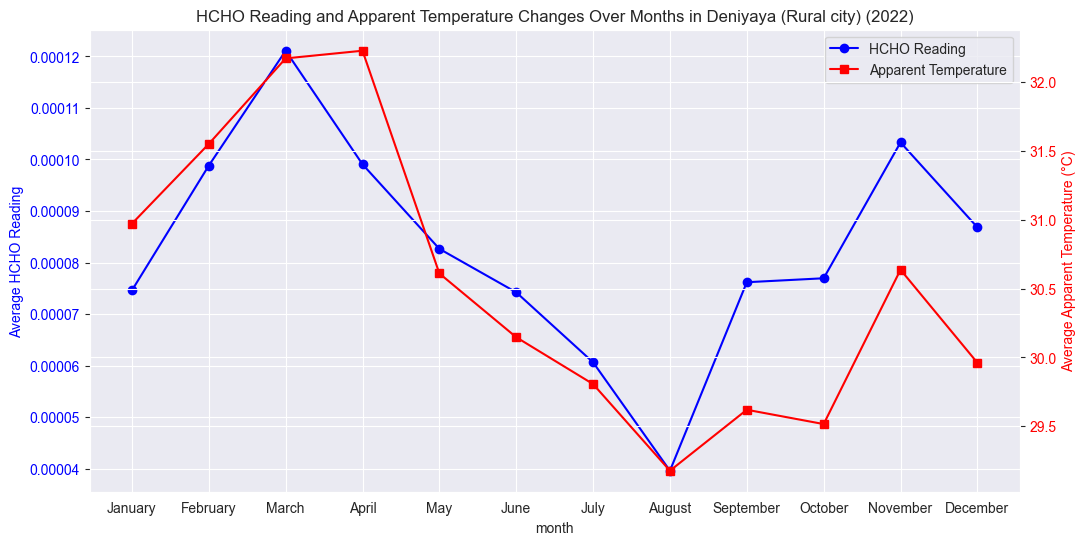

In [21]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = deniyaya_df.groupby('month')['HCHO reading'].mean()
    
    # Filter the weather data for the current year and city 'Deniyaya'
    deniyaya_year = weather_df[(weather_df['city'] == 'Matara') & (weather_df['year'] == year)]
    
    # Group by month and calculate the mean apparent temperature for each month
    monthly_avg_apparent_temp = deniyaya_year.groupby('month')['apparent_temperature_mean'].mean()
    
    # Create a new plot for the current year
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means_hcho, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create secondary y-axis for apparent temperature
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_apparent_temp, marker='s', color='red', label='Apparent Temperature')
    ax2.set_ylabel('Average Apparent Temperature (°C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    
    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])
    
    plt.title(f'HCHO Reading and Apparent Temperature Changes Over Months in Deniyaya (Rural city) ({year})')
    plt.grid(True)
    plt.show()

In [22]:
deniyaya_weather = weather_df[weather_df['city'] == 'Matara']

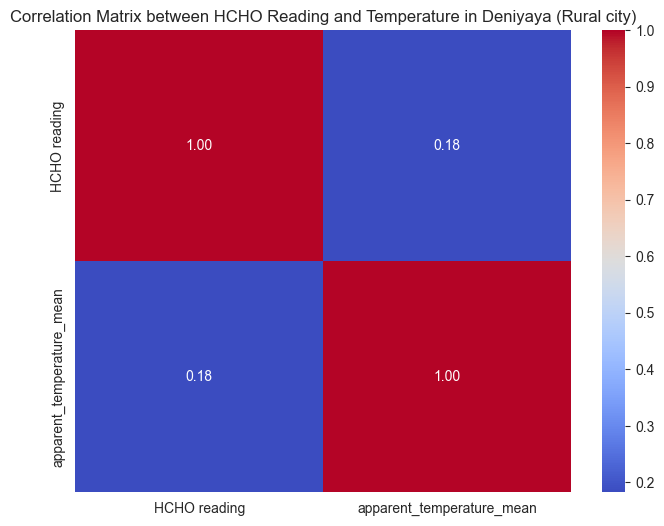

In [23]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(deniyaya_df, deniyaya_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','apparent_temperature_mean']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and Temperature in Deniyaya (Rural city)')
plt.show()

This Correlation matrix reveals a weak positive correlation between HCHO readings and apparent temperature (mean) in Deniyaya, Sri Lanka. While the correlation coefficient of 0.18 suggests a very slight positive association, it's important to acknowledge the weakness of this relationship. This implies that temperature changes may have a minimal influence on HCHO readings in Colombo. However, even a weak positive correlation indicates a potential for slightly higher HCHO readings coinciding with slightly increased apparent temperatures.


Across the analyzed datasets for both Colombo (urban) and Deniyaya (rural), the correlation matrices reveal a weak positive association between HCHO readings and apparent temperature (mean). This suggests that slight increases in temperature might correspond to marginally higher HCHO readings, and vice versa. However, the correlation coefficients, with values close to zero, indicate a very weak relationship. It is a possible that temperature interacts with other environmental factors to exert a combined influence on HCHO levels.


### Comparing how rain affects on HCHO readings

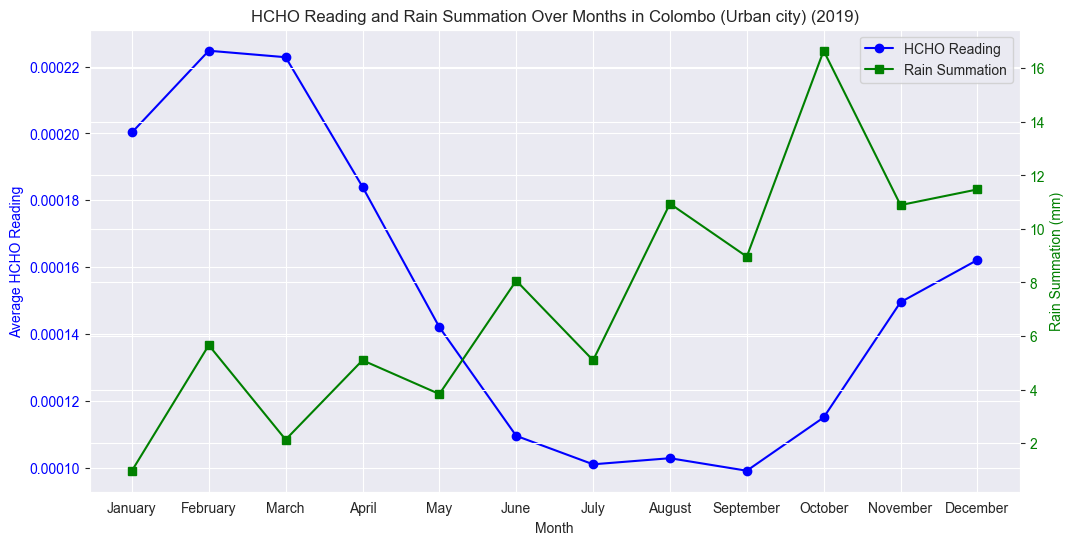

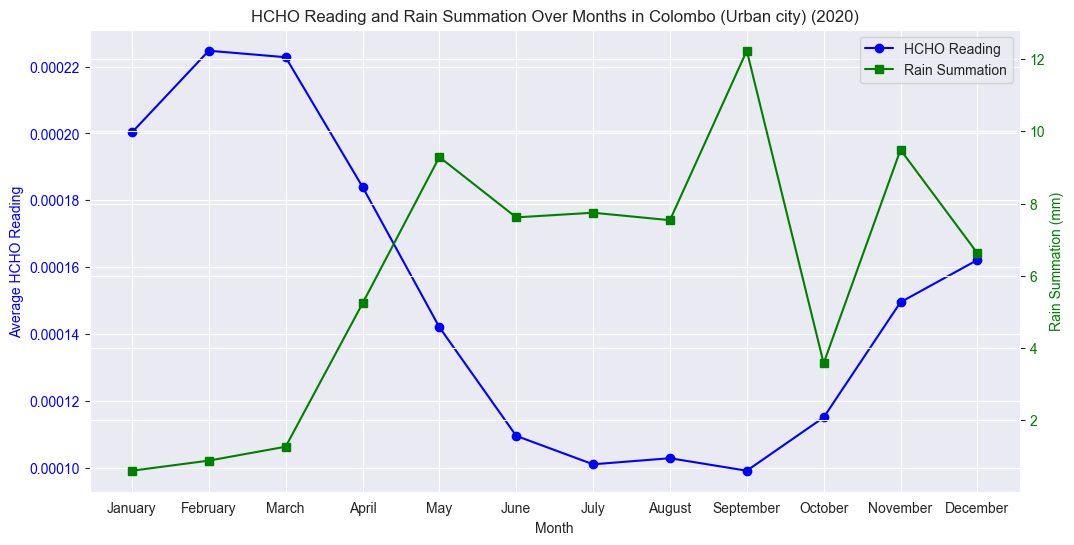

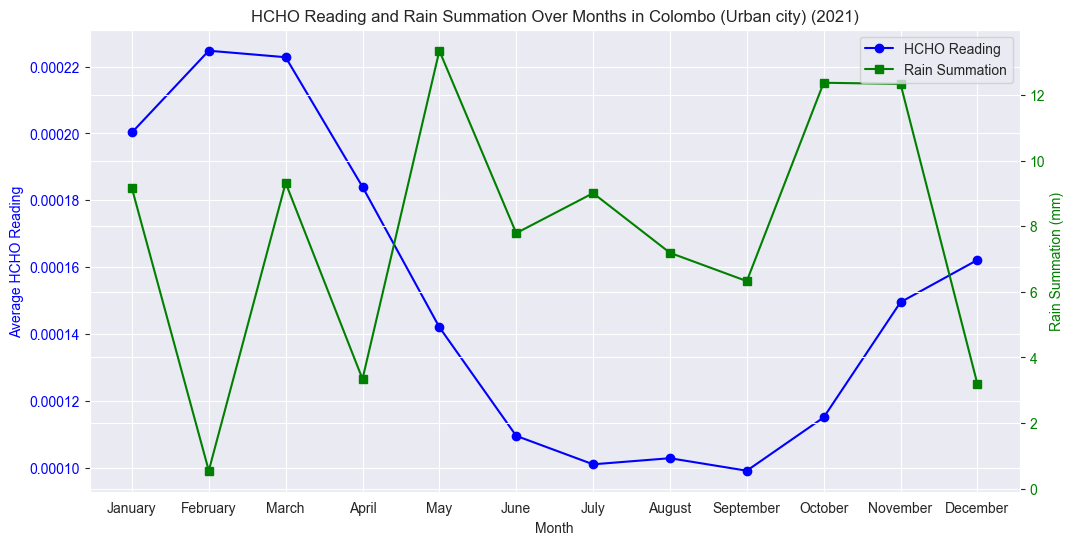

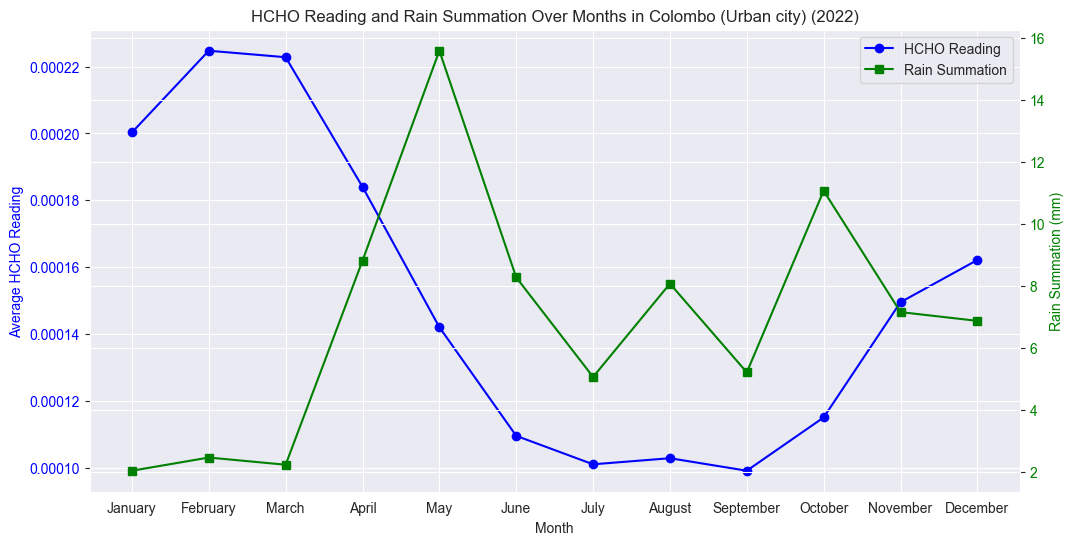

In [24]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    # Calculate monthly mean HCHO readings
    monthly_means = colombo_df.groupby('month')['HCHO reading'].mean()

    # Filter weather data for the specific year and city
    weather_year = weather_df[(weather_df['city'] == 'Colombo') & (weather_df['year'] == year)]
    # Calculate monthly average rain summation
    monthly_avg_rain_sum = weather_year.groupby('month')['rain_sum'].mean()

    # Create plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means.index, monthly_means.values, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for rain summation
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_rain_sum.index, monthly_avg_rain_sum.values, marker='s', color='green', label='Rain Summation')
    ax2.set_ylabel('Rain Summation (mm)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])

    # Title and grid
    plt.title(f'HCHO Reading and Rain Summation Over Months in Colombo (Urban city) ({year})')
    plt.grid(True)

    # Show plot
    plt.show()

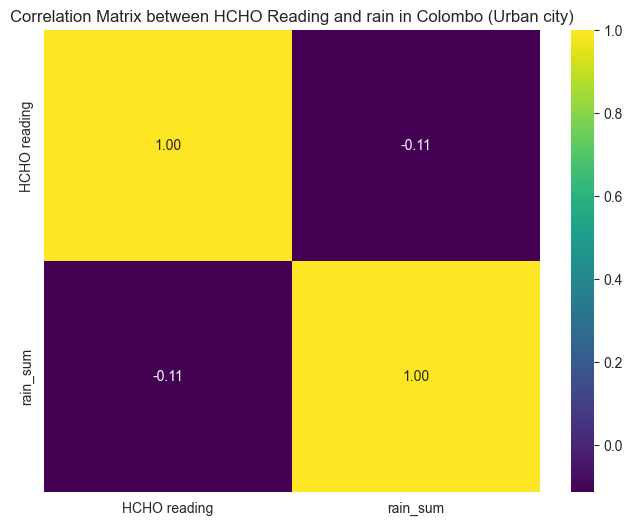

In [25]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(colombo_df, colombo_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','rain_sum']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and rain in Colombo (Urban city)')
plt.show()

The correlation matrix above reveals a weak negative correlation between HCHO readings and rain sum in Colombo, Sri Lanka. The correlation coefficient, represented by a value of -0.11, suggests a very slight inverse relationship between the two variables. This means that when there is a higher amount of rain (indicated by a higher rain sum), there might be a small corresponding decrease in HCHO readings, and vice versa. However, the closeness of the coefficient to zero (0 indicates no correlation) suggests that this negative relationship is very weak.

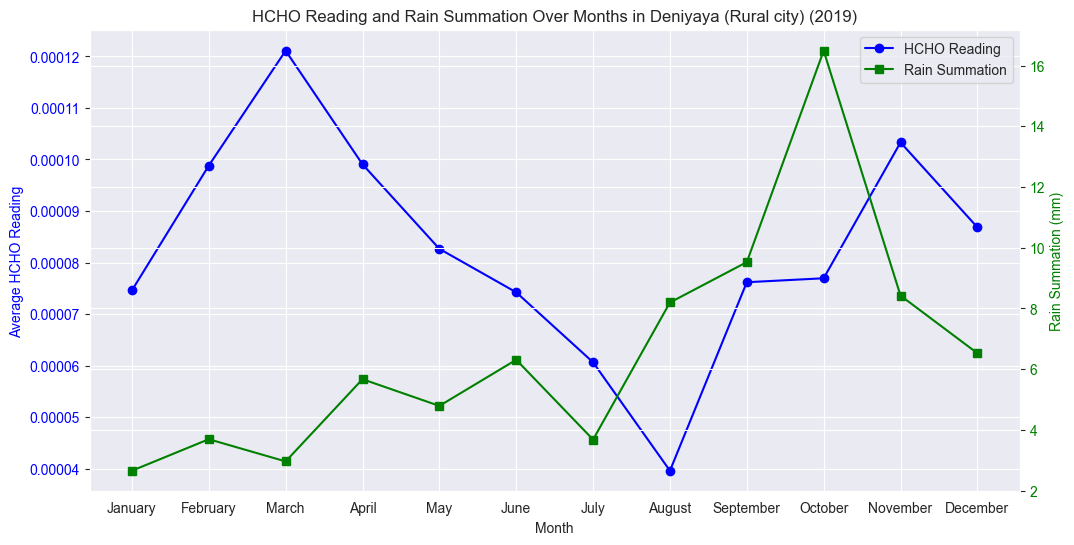

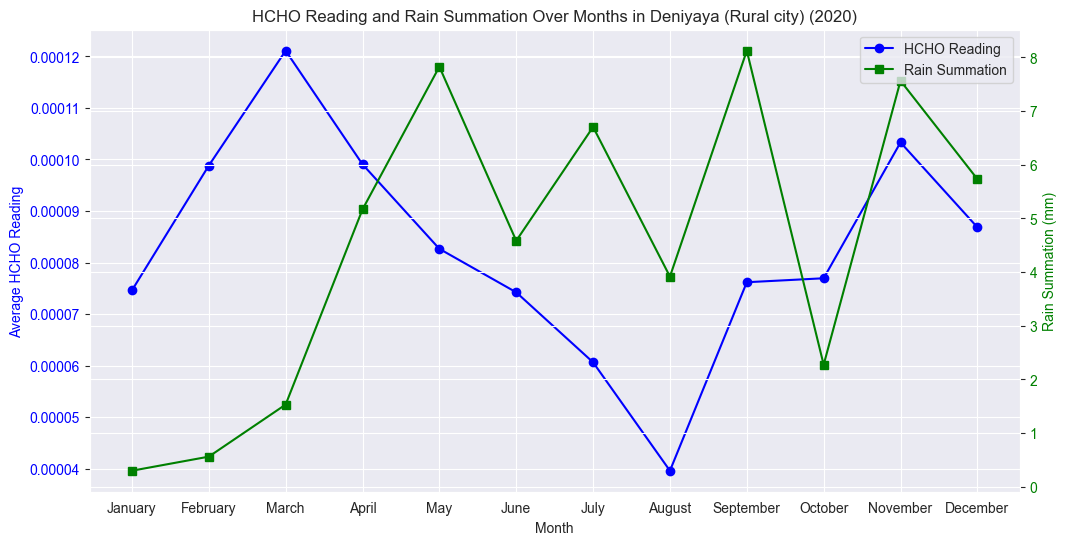

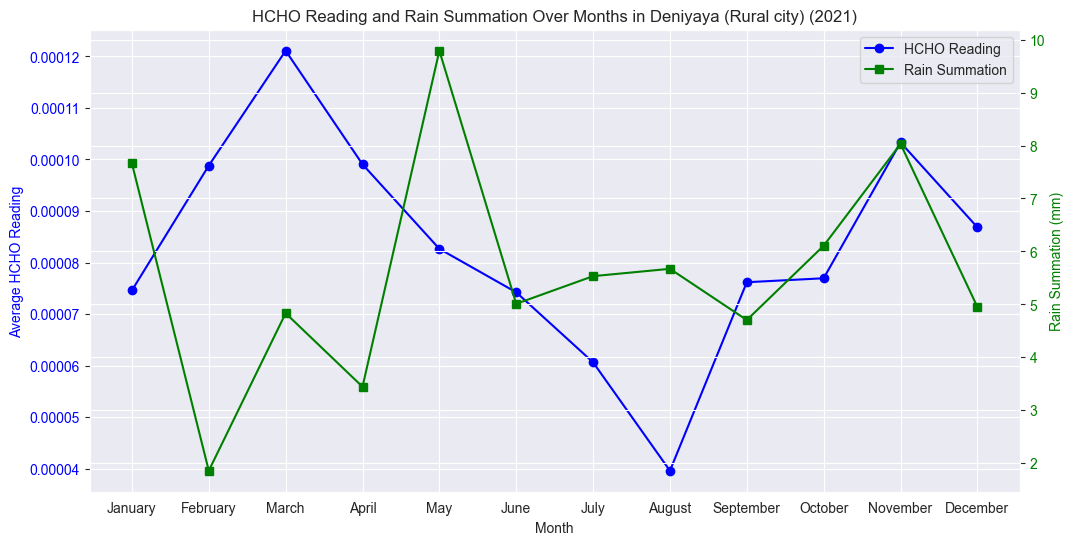

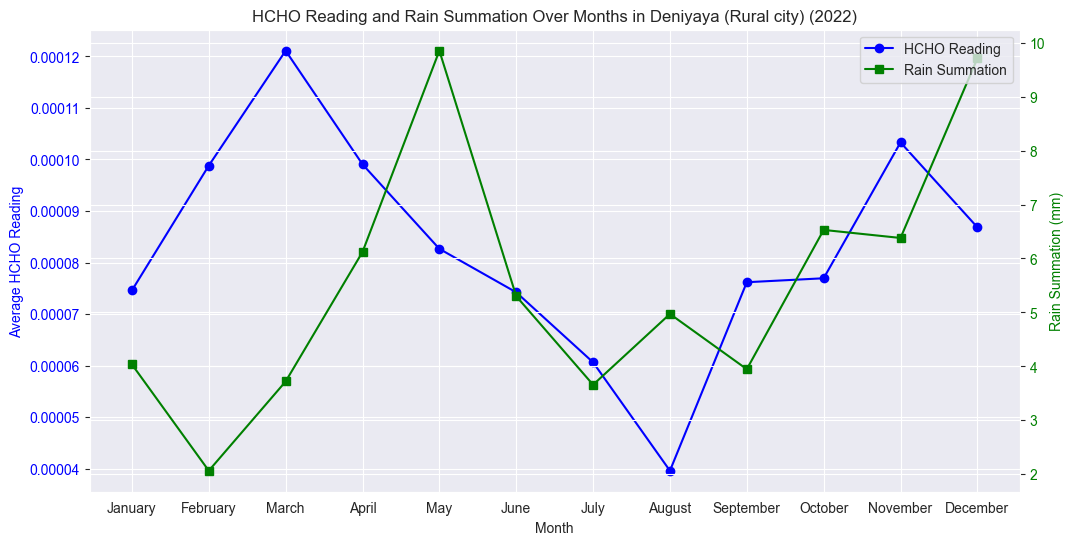

In [26]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    # Calculate monthly mean HCHO readings
    monthly_means = deniyaya_df.groupby('month')['HCHO reading'].mean()

    # Filter weather data for the specific year and city
    weather_year = weather_df[(weather_df['city'] == 'Matara') & (weather_df['year'] == year)]
    # Calculate monthly average rain summation
    monthly_avg_rain_sum = weather_year.groupby('month')['rain_sum'].mean()

    # Create plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means.index, monthly_means.values, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for rain summation
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_rain_sum.index, monthly_avg_rain_sum.values, marker='s', color='green', label='Rain Summation')
    ax2.set_ylabel('Rain Summation (mm)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])

    # Title and grid
    plt.title(f'HCHO Reading and Rain Summation Over Months in Deniyaya (Rural city) ({year})')
    plt.grid(True)

    # Show plot
    plt.show()

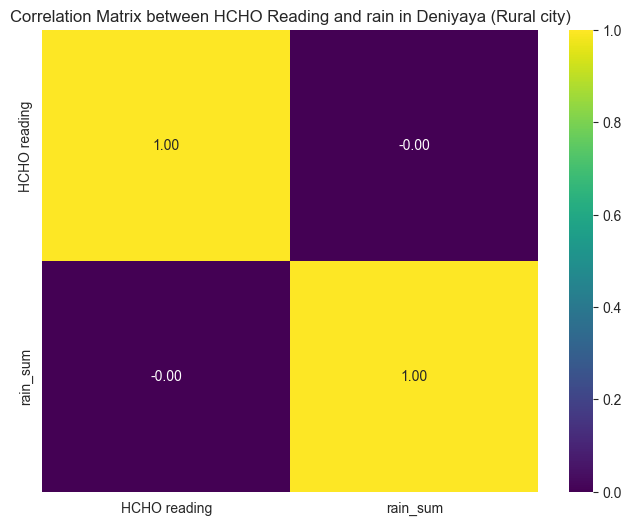

In [27]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(deniyaya_df, deniyaya_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','rain_sum']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and rain in Deniyaya (Rural city)')
plt.show()

The correlation matrix above reveals a near-zero correlation between HCHO readings and rain sum in Deniyaya, Sri Lanka. The correlation coefficient itself is zero.  Because correlation coefficients range from -1 to +1, a value of zero indicate no linear relationship between the two variables. In simpler terms, there is no clear association between HCHO readings and the amount of rainfall in Deniyaya.


An examination of the correlation matrices for Colombo and Deniyaya reveals a weak or negligible relationship between rainfall and HCHO readings. While Colombo exhibits a slightly negative correlation coefficient, suggesting a possible minor decrease in HCHO during periods of higher rainfall, the value is very close to zero, indicating a very weak association at best. Deniyaya, on the other hand, displays a near-zero correlation coefficient, signifying no clear linear relationship between the two variables. These findings suggest that rainfall likely plays a minimal role in influencing HCHO concentrations in both urban and rural environments of Sri Lanka.


### The influence of Population on HCHO readings

In [28]:
data['year'] = pd.to_datetime(data['Current Date']).dt.year
data['month'] = pd.to_datetime(data['Current Date']).dt.month


In [29]:
data_df = data[data['year']==2023]
data_df

,HCHO reading,Location,Current Date,Month,year,month
1428,0.000220,Colombo Proper,2023-01-01,2023-01,2023,1
1429,0.000210,Colombo Proper,2023-01-02,2023-01,2023,1
1430,0.000160,Colombo Proper,2023-01-03,2023-01,2023,1
1431,0.000242,Colombo Proper,2023-01-04,2023-01,2023,1
1432,0.000277,Colombo Proper,2023-01-05,2023-01,2023,1
...,...,...,...,...,...,...
12427,0.000237,Nuwara Eliya Proper,2023-12-27,2023-12,2023,12
12428,0.000237,Nuwara Eliya Proper,2023-12-28,2023-12,2023,12
12429,0.000237,Nuwara Eliya Proper,2023-12-29,2023-12,2023,12
12430,0.000237,Nuwara Eliya Proper,2023-12-30,2023-12,2023,12


In [30]:
data = data.groupby(['Location','year'])['HCHO reading'].mean()
population_df = pd.read_csv("DataSets/country-cities-data.csv")
population_df

,city,country,pop2024,latitude,longitude
0,Colombo,Sri Lanka,648034,6.93194,79.8478
1,Dehiwala-Mount Lavinia,Sri Lanka,219827,6.84019,79.8712
2,Moratuwa,Sri Lanka,185031,6.77300,79.8816
3,Jaffna,Sri Lanka,169102,9.66845,80.0074
4,Negombo,Sri Lanka,137223,7.20830,79.8358
...,...,...,...,...,...
60,Horana South,Sri Lanka,8982,6.71590,80.0626
61,Wattegama,Sri Lanka,8000,6.79890,81.4808
62,Minuwangoda,Sri Lanka,7772,7.16630,79.9533
63,Horawala Junction,Sri Lanka,7500,6.48088,80.1271


In [31]:
population_df = population_df[population_df['city'].isin(["Colombo", "Jaffna", "Kurunegala", "Nuwara Eliya", "Kandy", "Matara", "Monaragala"])]
population_df

,city,country,pop2024,latitude,longitude
0,Colombo,Sri Lanka,648034,6.93194,79.8478
3,Jaffna,Sri Lanka,169102,9.66845,80.0074
7,Kandy,Sri Lanka,111701,7.29550,80.6356
15,Matara,Sri Lanka,76254,5.94851,80.5353
41,Kurunegala,Sri Lanka,28571,7.48630,80.3623
42,Nuwara Eliya,Sri Lanka,25775,6.97078,80.7829
57,Monaragala,Sri Lanka,10236,6.87140,81.3487


In [32]:
# Update city names in population_df
population_df.loc[population_df['city'] == 'Colombo', 'city'] = 'Colombo Proper'
population_df.loc[population_df['city'] == 'Jaffna', 'city'] = 'Jaffna Proper'
population_df.loc[population_df['city'] == 'Kandy', 'city'] = 'Kandy Proper'
population_df.loc[population_df['city'] == 'Nuwara Eliya', 'city'] = 'Nuwara Eliya Proper'
population_df.loc[population_df['city'] == 'Matara', 'city'] = 'Deniyaya, Matara'
population_df.loc[population_df['city'] == 'Monaragala', 'city'] = 'Bibile, Monaragala'
population_df.loc[population_df['city'] == 'Kurunegala', 'city'] = 'Kurunegala Proper'
population_df
        

,city,country,pop2024,latitude,longitude
0,Colombo Proper,Sri Lanka,648034,6.93194,79.8478
3,Jaffna Proper,Sri Lanka,169102,9.66845,80.0074
7,Kandy Proper,Sri Lanka,111701,7.29550,80.6356
15,"Deniyaya, Matara",Sri Lanka,76254,5.94851,80.5353
41,Kurunegala Proper,Sri Lanka,28571,7.48630,80.3623
42,Nuwara Eliya Proper,Sri Lanka,25775,6.97078,80.7829
57,"Bibile, Monaragala",Sri Lanka,10236,6.87140,81.3487


In [33]:
population_df.columns

Index(['city', 'country', 'pop2024', 'latitude', 'longitude'], dtype='object')

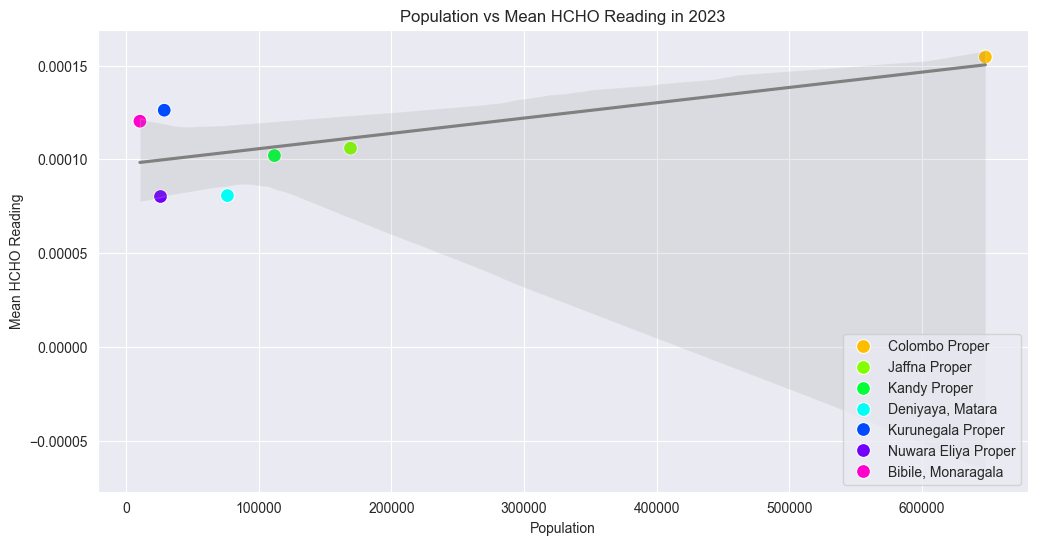

In [34]:
# Calculate mean HCHO reading for 2023
mean_hcho_2023 = data_df[data_df['year'] == 2023].groupby('Location')['HCHO reading'].mean()

# Merge population data for 2023 with mean HCHO readings for each location
merged_data = pd.merge(population_df[['city', 'pop2024']], mean_hcho_2023, left_on='city', right_index=True)

# Reset index to use default integer index
merged_data = merged_data.reset_index()

# Plot population vs mean HCHO reading for 2023
plt.figure(figsize=(12, 6))

# Define color palette for locations
colors = sns.color_palette("hsv", len(merged_data))

# Scatter plot with marker size proportional to population count
sns.scatterplot(x='pop2024', 
                y='HCHO reading', 
                hue='city', 
                data=merged_data, 
                palette=colors,
                s=100)

# Add trend line
sns.regplot(data=merged_data, x='pop2024', y='HCHO reading', scatter=False, color='gray')

plt.title('Population vs Mean HCHO Reading in 2023')
plt.xlabel('Population')
plt.ylabel('Mean HCHO Reading')

# Add legend
plt.legend(loc='lower right')

plt.grid(True)
plt.show()

The analysis of population versus mean HCHO reading reveals a positive trend, with Colombo, the most populous city, exhibiting the highest HCHO levels. This aligns with expectations, as higher population density is often associated with increased traffic congestion and industrial activity, both of which can contribute to HCHO emissions. However, an intriguing outlier emerges in Bibile, Monaragala, the location with the lowest population. Despite its low population density, Bibile exhibits HCHO readings that are surprisingly high. This exceptional data point warrants further investigation to understand the potential contributing factors that might be elevating HCHO levels in Bibile specifically.

### The influence of Altitude level on HCHO readings

First lets find out altitude levels in required cities.

1. Colombo :- 1 m
2. Kandy :- 500 m
3. Kurunegala :- 116 m
4. Jaffna :- 5 m
5. Bibile :- 151 m
6. Deniyaya :- 2 m
7. Nuwara Eliya :- 1868 m  

In [35]:
# Create a dictionary with the city names as keys and altitude values as values
altitude_data = {
    'Location': ['Colombo Proper', 'Kandy Proper', 'Kurunegala Proper', 'Jaffna Proper', 'Bibile, Monaragala', 'Deniyaya, Matara', 'Nuwara Eliya Proper'],
    'Altitude Value(m)': [1, 500, 116, 5, 151, 2, 1868]
}

# Create the altitude_df DataFrame
altitude_df = pd.DataFrame(altitude_data)
altitude_df

,Location,Altitude Value(m)
0,Colombo Proper,1
1,Kandy Proper,500
2,Kurunegala Proper,116
3,Jaffna Proper,5
4,"Bibile, Monaragala",151
5,"Deniyaya, Matara",2
6,Nuwara Eliya Proper,1868


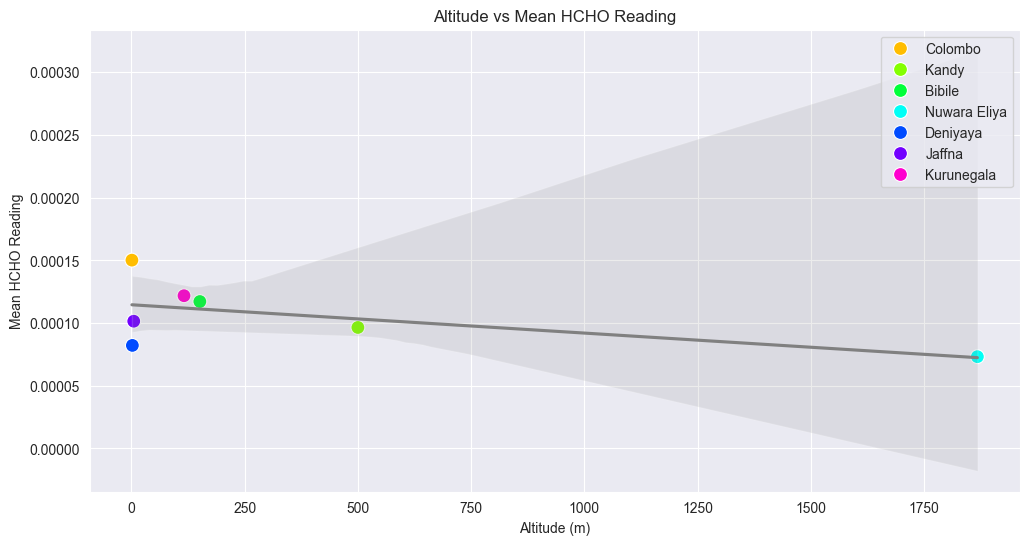

In [36]:
# Read the city dataframes
colombo_df = pd.read_csv('DataSets/ColomboData.csv')
kandy_df = pd.read_csv('DataSets/KandyData.csv')
bibile_df = pd.read_csv('DataSets/BibileData.csv')
nuwaraEliya_df = pd.read_csv('DataSets/NuwaraEliyData.csv')
deniyaya_df = pd.read_csv('DataSets/DeniyayaData.csv')
jaffna_df = pd.read_csv('DataSets/JaffnaData.csv')
kurunegala_df = pd.read_csv('DataSets/KurunegalaData.csv')

# Calculate mean HCHO readings for each city
colombo_mean = colombo_df['HCHO reading'].mean()
kandy_mean = kandy_df['HCHO reading'].mean()
bibile_mean = bibile_df['HCHO reading'].mean()
nuwaraEliya_mean = nuwaraEliya_df['HCHO reading'].mean()
deniyaya_mean = deniyaya_df['HCHO reading'].mean()
jaffna_mean = jaffna_df['HCHO reading'].mean()
kurunegala_mean = kurunegala_df['HCHO reading'].mean()

# Create a DataFrame for altitude values
altitude_data = {
    'Location': ['Colombo', 'Kandy', 'Bibile', 'Nuwara Eliya', 'Deniyaya', 'Jaffna', 'Kurunegala'],
    'Altitude Value': [1, 500, 151, 1868, 2, 5, 116]
}
altitude_df = pd.DataFrame(altitude_data)

# Merge altitude data with mean HCHO readings
merged_data = pd.merge(altitude_df, pd.DataFrame({
    'Location': ['Colombo', 'Kandy', 'Bibile', 'Nuwara Eliya', 'Deniyaya', 'Jaffna', 'Kurunegala'],
    'Mean HCHO Reading': [colombo_mean, kandy_mean, bibile_mean, nuwaraEliya_mean, deniyaya_mean, jaffna_mean, kurunegala_mean]
}), on='Location')

# Plot altitude vs mean HCHO readings
plt.figure(figsize=(12, 6))

# Define color palette for locations
colors = sns.color_palette("hsv", len(merged_data))

# Scatter plot with marker size proportional to altitude level
sns.scatterplot(x='Altitude Value', 
                y='Mean HCHO Reading', 
                hue='Location', 
                data=merged_data, 
                palette=colors,
                s=100)

# Add trend line
sns.regplot(data=merged_data, x='Altitude Value', y='Mean HCHO Reading', scatter=False, color='gray')

plt.title('Altitude vs Mean HCHO Reading')
plt.xlabel('Altitude (m)')
plt.ylabel('Mean HCHO Reading')

# Add legend
plt.legend(loc='upper right')

plt.grid(True)
plt.show()

The graph reveals a clear trend:  mean HCHO readings decrease as the altitude of Sri Lankan cities increases. This suggests that air quality generally improves at higher elevations.  There are two likely explanations for this observation.  First, cities at higher altitudes tend to have fewer pollution sources like vehicles and factories, which contribute to HCHO emissions. Second, the thinner air at higher altitudes allows any existing pollutants to become more dispersed, further reducing their concentration.  This trend highlights the significant impact of location, specifically altitude, on air quality.  Cities situated at higher elevations are likely to have lower HCHO levels, potentially offering cleaner air for their residents.